# Pandas
    80% of data analysis is spent on the process of cleaning and preparing the data (Dasu and Johnson, Exploratory data mining and data cleaning, Wiley, 2003)

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
pd.__version__

'0.19.2'

Pandas package define 3 classes: 
    - Series    - wrappers around numpy vectors, represent columns (variables)
    - Index     - Similar to Series, but used to store row/column names
    - DataFrame - sequences/dictionaries (container) of Series - represent tabular data

In [2]:
np.random.seed(123)
pd.DataFrame({ # a dict
        # key-column names, value-column values
        "A": np.round(np.random.uniform(0, 1, 5), 2),
        "B": ["f", None, "f", "m", "f"],
        "C": np.random.choice([True, False], 5, True, [0.4, 0.6])
    })
# lengths are identical

      A     B      C
0  0.70     f  False
1  0.29  None  False
2  0.23     f  False
3  0.55     m  False
4  0.72     f   True

In [3]:
A = np.r_[:12].reshape(4,3)
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
pd.DataFrame(A)

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [5]:
pd.DataFrame(A, columns = ['A', 'B', 'C'])  ## assign column names

   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [6]:
pairs = [
    ("A", np.r_[8, 3, 4]),
    ('B', range(3)),
    ('C', ['aaa', 'bbb', 'ccccc'])
]

In [7]:
pd.DataFrame.from_items(pairs)

   A  B      C
0  8  0    aaa
1  3  1    bbb
2  4  2  ccccc

In [8]:
pd.DataFrame(pairs)

   0                  1
0  A          [8, 3, 4]
1  B          (0, 1, 2)
2  C  [aaa, bbb, ccccc]

In [9]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv", comment = '#')
birth_dates.head()

               Name   BirthDate
0    Hung Hyun-Seok  12.06.2000
1  Benno Blumenthal  31.12.1918
2  Paitoon Ornwimol  26.06.1958
3    P'yon Yong-Sun  10.07.1947
4    Étienne Chaney  04.09.1983

**useful args: **

    decimal : str, default '.'    - Character to recognize as decimal point(e.g., use ',' for european data).
    sep: str, default = ','       - Delimiter to use
    
    birth_dates.to_csv()          - A method that writes a csv file

In [10]:
np.random.seed(123)
x = pd.DataFrame({ # a dict
        # key-column names, value-column values
        "A": np.round(np.random.uniform(0, 1, 5), 2),
        "B": ["f", None, "f", "m", "f"],
        "C": np.random.choice([True, False], 5, True, [0.4, 0.6])
    })
print(x)

      A     B      C
0  0.70     f  False
1  0.29  None  False
2  0.23     f  False
3  0.55     m  False
4  0.72     f   True


In [11]:
x.shape

(5, 3)

In [12]:
len(x)  ## length of the dataframes is the number of rows

5

In [13]:
for e in x:
    # iterating over dataframes - iterating over column names
    print(e)

A
B
C


In [14]:
birth_dates.head(3) # default is 5

               Name   BirthDate
0    Hung Hyun-Seok  12.06.2000
1  Benno Blumenthal  31.12.1918
2  Paitoon Ornwimol  26.06.1958

In [15]:
birth_dates.tail(4)

                 Name   BirthDate
128    Romualdo Marin  04.09.1982
129   Felicita Wilbur  07.06.1982
130  Kaminaga Ichibei  28.03.1996
131       Vania Toler  28.02.2000

In [16]:
x.dtypes

A    float64
B     object
C       bool
dtype: object

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
A    5 non-null float64
B    4 non-null object
C    5 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 165.0+ bytes


# Series

In [18]:
x["A"] # equivalently x.get('A')

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [19]:
type(x['A'])

pandas.core.series.Series

In [20]:
x.A

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [21]:
pd.DataFrame(x.A)

      A
0  0.70
1  0.29
2  0.23
3  0.55
4  0.72

In [22]:
pd.Series(np.r_[np.nan, 0:1:4j])

0         NaN
1    0.000000
2    0.333333
3    0.666667
4    1.000000
dtype: float64

In [23]:
x.A.values

array([ 0.7 ,  0.29,  0.23,  0.55,  0.72])

In [24]:
x.A.value_counts

<bound method IndexOpsMixin.value_counts of 0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64>

In [25]:
x.B.values

array(['f', None, 'f', 'm', 'f'], dtype=object)

In [26]:
x.C.values

array([False, False, False, False,  True], dtype=bool)

## date-time data

In [27]:
pd.Series(pd.date_range("2017-01-30", periods = 3)) # freq = 'D'

0   2017-01-30
1   2017-01-31
2   2017-02-01
dtype: datetime64[ns]

In [28]:
pd.Series(pd.date_range("2017-01-30 10:30", periods = 5, freq = '60S'))

0   2017-01-30 10:30:00
1   2017-01-30 10:31:00
2   2017-01-30 10:32:00
3   2017-01-30 10:33:00
4   2017-01-30 10:34:00
dtype: datetime64[ns]

In [29]:
pd.Series(pd.date_range("2017", "2018", freq = '3M'))

0   2017-01-31
1   2017-04-30
2   2017-07-31
3   2017-10-31
dtype: datetime64[ns]

In [30]:
birth_dates['BirthDate'].head()

0    12.06.2000
1    31.12.1918
2    26.06.1958
3    10.07.1947
4    04.09.1983
Name: BirthDate, dtype: object

In [31]:
# convert birth_dates["BirthDate"] to datetime
pd.to_datetime(birth_dates['BirthDate']).head()

0   2000-12-06
1   1918-12-31
2   1958-06-26
3   1947-10-07
4   1983-04-09
Name: BirthDate, dtype: datetime64[ns]

## Categorical data
    on nominal (qualitative) or ordinal(ordered) scales
    
    in R: factors

In [32]:
x.B

0       f
1    None
2       f
3       m
4       f
Name: B, dtype: object

In [33]:
x['B'] = pd.Series(x['B'], dtype ="category")
x['B']

0      f
1    NaN
2      f
3      m
4      f
Name: B, dtype: category
Categories (2, object): [f, m]

In [34]:
x.B.cat.codes ## -1 to missing values

0    0
1   -1
2    0
3    1
4    0
dtype: int8

In [35]:
x.B.cat.categories

Index(['f', 'm'], dtype='object')

In [36]:
p = pd.Series(pd.Categorical(
    ["a", "c", "b", "a", "a", "c"],
        categories = ["c", "b", "a"],
        ordered = True
    ))
p

0    a
1    c
2    b
3    a
4    a
5    c
dtype: category
Categories (3, object): [c < b < a]

In [37]:
p.sort_values()

1    c
5    c
2    b
0    a
3    a
4    a
dtype: category
Categories (3, object): [c < b < a]

In [38]:
p.cat.categories = ["S", "M", "L"]
p

0    L
1    S
2    M
3    L
4    L
5    S
dtype: category
Categories (3, object): [S < M < L]

In [39]:
x.A

0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [40]:
## numerical values can be also changed to categorical values
pd.cut(x.A, np.r_[0, 0.5, 1], right = False)

0    [0.5, 1)
1    [0, 0.5)
2    [0, 0.5)
3    [0.5, 1)
4    [0.5, 1)
Name: A, dtype: category
Categories (2, object): [[0, 0.5) < [0.5, 1)]

In [41]:
pd.cut(x.A, np.r_[0, 0.5, 1], right = False, labels = ['small', 'large'])

0    large
1    small
2    small
3    large
4    large
Name: A, dtype: category
Categories (2, object): [small < large]

___
**categorical variables are used if we have #unique values << #observations**
**Advantages**
    1. we save space
    2. we save time(processing ints is faster than processing strings)
    3. int representation might be convenient
___

In [42]:
tips = pd.read_csv("http://gagolewski.com/resources/data/tips.csv", comment = '#')
tips.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [43]:
tips.sex.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: object

In [44]:
tips["sex"] = tips["sex"].astype('category')

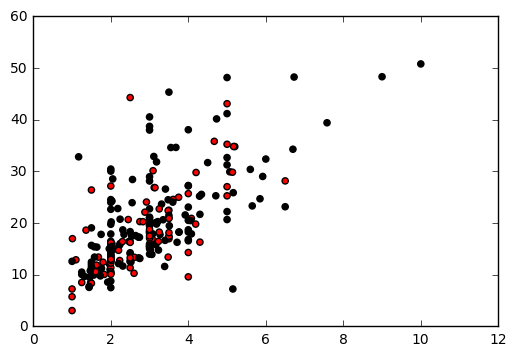

In [45]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(tips.tip.values, tips.total_bill.values, c=tips.sex.cat.codes.values, cmap = 'flag')

# Index

In [46]:
x

      A    B      C
0  0.70    f  False
1  0.29  NaN  False
2  0.23    f  False
3  0.55    m  False
4  0.72    f   True

In [47]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [48]:
x.columns

Index(['A', 'B', 'C'], dtype='object')

In [49]:
y = x.set_index(np.linspace(0, 1, 5))
y

         A    B      C
0.00  0.70    f  False
0.25  0.29  NaN  False
0.50  0.23    f  False
0.75  0.55    m  False
1.00  0.72    f   True

In [50]:
y.index

Float64Index([0.0, 0.25, 0.5, 0.75, 1.0], dtype='float64')

In [51]:
y.index = ['a1', 'b1', 'c1', 'd1', 'e1']
y

       A    B      C
a1  0.70    f  False
b1  0.29  NaN  False
c1  0.23    f  False
d1  0.55    m  False
e1  0.72    f   True

In [52]:
y.index

Index(['a1', 'b1', 'c1', 'd1', 'e1'], dtype='object')

In [53]:
y.index = ['a', 'b', 'c', 'a', 'd']
y

      A    B      C
a  0.70    f  False
b  0.29  NaN  False
c  0.23    f  False
a  0.55    m  False
d  0.72    f   True

In [54]:
# so these are labels, not identifiers
y.index.is_monotonic, y.index.is_unique

(False, False)

In [55]:
x.index.is_monotonic, x.index.is_unique

(True, True)

In [56]:
# each index can be named
x.index.name = 'ROWS'
x.columns.name = 'COLS'
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True

In [57]:
# hierarchial indexes
y = pd.DataFrame({
        "A": np.round(np.random.uniform(0, 1, 6), 2)
    })

y.index = pd.MultiIndex(
    levels = [['x', 'y', 'z'], [1, 2, 3, 4]],
    labels = [
            [0, 0, 0, 1, 1, 2],
            [0, 1, 3, 0, 1, 2]
    ],
    names = ['top', 'bottom']
)
y

               A
top bottom      
x   1       0.34
    2       0.73
    4       0.44
y   1       0.06
    2       0.40
z   3       0.74

In [58]:
flights = pd.read_csv("http://gagolewski.com/resources/data/flights.csv", comment = '#')
flights.head(14)

    year      month  passengers
0   1949    January         112
1   1949   February         118
2   1949      March         132
3   1949      April         129
4   1949        May         121
5   1949       June         135
6   1949       July         148
7   1949     August         148
8   1949  September         136
9   1949    October         119
10  1949   November         104
11  1949   December         118
12  1950    January         115
13  1950   February         126

In [59]:
# set index to consist of years and months
flights.set_index(['year', 'month']).head(14)

                passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
     June              135
     July              148
     August            148
     September         136
     October           119
     November          104
     December          118
1950 January           115
     February          126

In [60]:
# list of pairs like(year, month)
# tuples = [(1949, 'january'), (1949, 'February')......]
tuples = list(zip(flights.year, flights.month))
tuples[:4]

[(1949, 'January'), (1949, 'February'), (1949, 'March'), (1949, 'April')]

In [61]:
flights2 = flights.copy()
flights2.index = pd.MultiIndex.from_tuples(
    tuples
)
flights2.index.names = ['year', 'month']
flights2.head(14)

                year      month  passengers
year month                                 
1949 January    1949    January         112
     February   1949   February         118
     March      1949      March         132
     April      1949      April         129
     May        1949        May         121
     June       1949       June         135
     July       1949       July         148
     August     1949     August         148
     September  1949  September         136
     October    1949    October         119
     November   1949   November         104
     December   1949   December         118
1950 January    1950    January         115
     February   1950   February         126

## Indexing (subsetting) Series and DataFrame objects


In [62]:
np.random.seed(123)
b = pd.Series(np.round(np.random.uniform(0, 1, 10), 2))
i = np.r_[0:10]
np.random.shuffle(i)
b.index = i
b

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
6    0.68
3    0.48
0    0.39
dtype: float64

In [63]:
c = b.copy()
c.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
c

a    0.70
b    0.29
c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
h    0.68
i    0.48
j    0.39
dtype: float64

In [64]:
# never do this:
b[0:1]  ## position based indexing

2    0.7
dtype: float64

In [65]:
b[0:5:2]   ## position based indexing

2    0.70
8    0.23
9    0.72
dtype: float64

In [66]:
b[b.values > 0.7] 

9    0.72
5    0.98
dtype: float64

In [67]:
b[0]  ## label based indexing

0.39000000000000001

In [68]:
b[[0, 1]] ## label based indexing

0    0.39
1    0.29
dtype: float64

In [69]:
### This is a bit confusing (label and position based indexing)
### that is why we use loc and iloc

# loc (label) and iloc(positional) attributes
b.loc[0]

0.39000000000000001

In [70]:
b.iloc[0]

0.69999999999999996

In [71]:
b.iloc[1:7]

1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
dtype: float64

In [72]:
b.loc[1:7]  ## labels from 1:7 based on their appearance

1    0.29
8    0.23
7    0.55
dtype: float64

In [73]:
c.loc['c': 'g']

c    0.23
d    0.55
e    0.72
f    0.42
g    0.98
dtype: float64

In [74]:
c.loc["c":'a': -1]

c    0.23
b    0.29
a    0.70
dtype: float64

In [75]:
c.loc[c.values > 0.7] # bool vector subsetting

e    0.72
g    0.98
dtype: float64

In [76]:
c.iloc[c.values > 0.7] # equivalent

e    0.72
g    0.98
dtype: float64

In [77]:
b.loc[[1, 3, 5]]

1    0.29
3    0.48
5    0.98
dtype: float64

In [78]:
b.iloc[[1, 3, 5]]

1    0.29
7    0.55
4    0.42
dtype: float64

In [79]:
c.loc[['a', 'b', 'c']]

a    0.70
b    0.29
c    0.23
dtype: float64

In [80]:
birth_dates.BirthDate = pd.to_datetime(birth_dates['BirthDate'])
birth_dates2 = birth_dates.copy()

birth_dates2 = birth_dates.set_index('BirthDate')
birth_dates2.head()

                        Name
BirthDate                   
2000-12-06    Hung Hyun-Seok
1918-12-31  Benno Blumenthal
1958-06-26  Paitoon Ornwimol
1947-10-07    P'yon Yong-Sun
1983-04-09    Étienne Chaney

In [81]:
birth_dates2.loc["1918-12-31"]

                        Name
BirthDate                   
1918-12-31  Benno Blumenthal

In [82]:
birth_dates2.loc["1918-12-31":"1925-01-01"]

                          Name
BirthDate                     
1918-12-31    Benno Blumenthal
1921-12-19       Nedeljko Bukv
1923-03-30  Gordan Mislopoljac
1921-11-06    Eufebio Mascioli
1924-07-31       Sawa Mobumasu
1922-11-10     Nishioka Nissho

In [83]:
def old_enough(d, today, y):
    # d - data frame like birth_dates2
    # today - a string like '2017-01-30'
    # y - e.g. 16
    which = d.index <= pd.to_datetime(today) - pd.tseries.offsets.DateOffset(years = y)
    return d.iloc[which]
old_enough(birth_dates2, "2016-02-29", 18)

                            Name
BirthDate                       
1918-12-31      Benno Blumenthal
1958-06-26      Paitoon Ornwimol
1947-10-07        P'yon Yong-Sun
1983-04-09        Étienne Chaney
1951-06-04     Marinko Stoilović
1911-01-11     Eckehard Grünfeld
1990-12-30          Spano Moresi
1926-04-10    Lothar Spiegelmann
1916-03-05    Adrianna Skoczylas
1937-04-23     Natanaël Barrande
1949-06-10          Muk Young-Su
1917-10-07      Alexandr Povýšil
1930-07-01           Ding Zexian
1929-10-25          Aurora Botín
1916-04-09            Aline Rush
1990-12-03          Tilman Baade
1975-01-04             Nae U-Jin
1966-03-29         Zbyněk Slavík
1931-11-23          Nico Erlbaum
1921-12-19         Nedeljko Bukv
1947-10-15    El Madani al-Fassi
1952-06-19   Duchanee Panomyaong
1962-01-12        Ewelina Musial
1938-04-24      Didier Cuvillier
1982-10-28          Ryom Woo-Jin
1964-11-02      Edouard Boissieu
1928-08-24       Benjamin Lahaye
1934-08-13        Michael Bohlen
1927-10-13

In [84]:
dates = "2000-02-27"
d = pd.DataFrame(
    {"Name": ['A', 'B', 'C', 'D', 'E']},
    index = pd.date_range(dates, periods, range = 5)
)

NameError: name 'periods' is not defined

In [86]:
y.A

top  bottom
x    1         0.34
     2         0.73
     4         0.44
y    1         0.06
     2         0.40
z    3         0.74
Name: A, dtype: float64

In [87]:
y.A.loc['x']

bottom
1    0.34
2    0.73
4    0.44
Name: A, dtype: float64

In [88]:
y.A.loc[['y', 'x']]

top  bottom
x    1         0.34
     2         0.73
     4         0.44
y    1         0.06
     2         0.40
Name: A, dtype: float64

In [89]:
y.A.loc[['y', 'x'], [2, 1]]

top  bottom
x    1         0.34
     2         0.73
y    1         0.06
     2         0.40
Name: A, dtype: float64

In [90]:
y.A.loc[('x', 1), ('y', 2)]

top  bottom
x    2         0.73
Name: A, dtype: float64

In [91]:
# flights[rows, cols] ---- don't use it
flights.iloc[:4, 0] # first 4 rows, first column

0    1949
1    1949
2    1949
3    1949
Name: year, dtype: int64

In [92]:
flights.loc[:,'month'].iloc[::12]

0      January
12     January
24     January
36     January
48     January
60     January
72     January
84     January
96     January
108    January
120    January
132    January
Name: month, dtype: object

In [93]:
flights.loc[:,'year'].iloc[::12]

0      1949
12     1950
24     1951
36     1952
48     1953
60     1954
72     1955
84     1956
96     1957
108    1958
120    1959
132    1960
Name: year, dtype: int64

In [94]:
tips.head()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [95]:
tips.loc[:, "sex":'day'].head()

      sex smoker  day
0  Female     No  Sun
1    Male     No  Sun
2    Male     No  Sun
3    Male     No  Sun
4  Female     No  Sun

In [96]:
# partition tips randomly 
# create two data frames: tips_train (80%) and tips_test (20%)
sa = np.r_[0: len(tips)]
np.random.shuffle(sa)
indices = sa
tips_train = tips.loc[indices[len(tips)//5:]]
tips_test = tips.loc[indices[:len(tips)//5]]
len(tips), len(tips_train), len(tips_test)

(244, 196, 48)

In [97]:
tips_train.head()

     total_bill   tip     sex smoker  day    time  size
208       24.27  2.03    Male    Yes  Sat  Dinner     2
230       24.01  2.00    Male    Yes  Sat  Dinner     4
61        13.81  2.00    Male    Yes  Sat  Dinner     2
33        20.69  2.45  Female     No  Sat  Dinner     4
37        16.93  3.07  Female     No  Sat  Dinner     3

In [98]:
tips_test.head()

     total_bill   tip     sex smoker   day    time  size
30         9.55  1.45    Male     No   Sat  Dinner     2
239       29.03  5.92    Male     No   Sat  Dinner     3
120       11.69  2.31    Male     No  Thur   Lunch     2
29        19.65  3.00  Female     No   Sat  Dinner     2
196       10.34  2.00    Male    Yes  Thur   Lunch     2

In [99]:
# partition tips randomly 
# create two data frames: tips_train (80%) and tips_test (20%)
i = np.random.permutation(np.arange(tips.shape[0]))
k = int(len(i)*0.8)
tips_train = tips.iloc[i[:k]]
tips_test = tips.iloc[i[k:]]
len(tips), len(tips_train), len(tips_test)

(244, 195, 49)

In [100]:
tips_train = tips.sample(frac = 0.8, random_state=123)  # setting seed with random state
tips_trst = tips.iloc[~tips.index.isin(tips_train.index), :]
len(tips), len(tips_train), len(tips_test)

(244, 195, 49)

In [101]:
tips.loc[tips.tip>5]

     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
44        30.40   5.60    Male     No   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
52        34.81   5.20  Female     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
88        24.71   5.85    Male     No  Thur   Lunch     2
116       29.93   5.07    Male     No   Sun  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
155       29.85   5.14  Female     No   Sun  Dinner     5
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
183       23.17   6.50    Male    Yes   Sun  Dinner     4
211       25.89   5.16    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.1

    1. Choose only Male data


In [102]:
tips[tips.sex == 'Male']

     total_bill   tip   sex smoker   day    time  size
1         10.34  1.66  Male     No   Sun  Dinner     3
2         21.01  3.50  Male     No   Sun  Dinner     3
3         23.68  3.31  Male     No   Sun  Dinner     2
5         25.29  4.71  Male     No   Sun  Dinner     4
6          8.77  2.00  Male     No   Sun  Dinner     2
7         26.88  3.12  Male     No   Sun  Dinner     4
8         15.04  1.96  Male     No   Sun  Dinner     2
9         14.78  3.23  Male     No   Sun  Dinner     2
10        10.27  1.71  Male     No   Sun  Dinner     2
12        15.42  1.57  Male     No   Sun  Dinner     2
13        18.43  3.00  Male     No   Sun  Dinner     4
15        21.58  3.92  Male     No   Sun  Dinner     2
17        16.29  3.71  Male     No   Sun  Dinner     3
19        20.65  3.35  Male     No   Sat  Dinner     3
20        17.92  4.08  Male     No   Sat  Dinner     2
23        39.42  7.58  Male     No   Sat  Dinner     4
24        19.82  3.18  Male     No   Sat  Dinner     2
25        

    2. Choose only total_bill in interval [10, 20]



In [103]:
tips[(tips.total_bill >= 10) & (tips.total_bill <=20)]

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
17        16.29  3.71    Male     No   Sun  Dinner     3
18        16.97  3.50  Female     No   Sun  Dinner     3
20        17.92  4.08    Male     No   Sat  Dinner     2
22        15.77  2.23  Female     No   Sat  Dinner     2
24        19.82  3.18    Male     No   Sat  Dinner     2
25        17.81  2.34    Male     No   Sat  Dinner     4
26        13.37  2.00    Male     No   Sat  Dinner     2
27        12.69  2.00    Male  

___
**3. Choose sat and sun data with tip > 5**
___

In [104]:
tips[((tips.day == 'Sat') | (tips.day == 'Sun')) & (tips.tip > 5)]

     total_bill    tip     sex smoker  day    time  size
23        39.42   7.58    Male     No  Sat  Dinner     4
44        30.40   5.60    Male     No  Sun  Dinner     4
47        32.40   6.00    Male     No  Sun  Dinner     4
52        34.81   5.20  Female     No  Sun  Dinner     4
59        48.27   6.73    Male     No  Sat  Dinner     4
116       29.93   5.07    Male     No  Sun  Dinner     4
155       29.85   5.14  Female     No  Sun  Dinner     5
170       50.81  10.00    Male    Yes  Sat  Dinner     3
172        7.25   5.15    Male    Yes  Sun  Dinner     2
181       23.33   5.65    Male    Yes  Sun  Dinner     2
183       23.17   6.50    Male    Yes  Sun  Dinner     4
211       25.89   5.16    Male    Yes  Sat  Dinner     4
212       48.33   9.00    Male     No  Sat  Dinner     4
214       28.17   6.50  Female    Yes  Sat  Dinner     3
239       29.03   5.92    Male     No  Sat  Dinner     3

In [105]:
tips[tips.day.isin(["Sun", "Sat"]) & (tips.tip > 5)]

     total_bill    tip     sex smoker  day    time  size
23        39.42   7.58    Male     No  Sat  Dinner     4
44        30.40   5.60    Male     No  Sun  Dinner     4
47        32.40   6.00    Male     No  Sun  Dinner     4
52        34.81   5.20  Female     No  Sun  Dinner     4
59        48.27   6.73    Male     No  Sat  Dinner     4
116       29.93   5.07    Male     No  Sun  Dinner     4
155       29.85   5.14  Female     No  Sun  Dinner     5
170       50.81  10.00    Male    Yes  Sat  Dinner     3
172        7.25   5.15    Male    Yes  Sun  Dinner     2
181       23.33   5.65    Male    Yes  Sun  Dinner     2
183       23.17   6.50    Male    Yes  Sun  Dinner     4
211       25.89   5.16    Male    Yes  Sat  Dinner     4
212       48.33   9.00    Male     No  Sat  Dinner     4
214       28.17   6.50  Female    Yes  Sat  Dinner     3
239       29.03   5.92    Male     No  Sat  Dinner     3

In [106]:
# Adding new columns
x['D'] = x['A']* 2.0 -1
x

COLS     A    B      C     D
ROWS                        
0     0.70    f  False  0.40
1     0.29  NaN  False -0.42
2     0.23    f  False -0.54
3     0.55    m  False  0.10
4     0.72    f   True  0.44

In [107]:
x.E = x['A']*2.0 -1   ### This doesnot work 
x

COLS     A    B      C     D
ROWS                        
0     0.70    f  False  0.40
1     0.29  NaN  False -0.42
2     0.23    f  False -0.54
3     0.55    m  False  0.10
4     0.72    f   True  0.44

In [108]:
x.insert(1, 'E', x['A']*2.0 -1)
x

COLS     A     E    B      C     D
ROWS                              
0     0.70  0.40    f  False  0.40
1     0.29 -0.42  NaN  False -0.42
2     0.23 -0.54    f  False -0.54
3     0.55  0.10    m  False  0.10
4     0.72  0.44    f   True  0.44

In [109]:
x = x.drop(['E'], axis = 1)
x

COLS     A    B      C     D
ROWS                        
0     0.70    f  False  0.40
1     0.29  NaN  False -0.42
2     0.23    f  False -0.54
3     0.55    m  False  0.10
4     0.72    f   True  0.44

In [110]:
x.insert(1, 'E', x['A']*2.0 -1)
x

COLS     A     E    B      C     D
ROWS                              
0     0.70  0.40    f  False  0.40
1     0.29 -0.42  NaN  False -0.42
2     0.23 -0.54    f  False -0.54
3     0.55  0.10    m  False  0.10
4     0.72  0.44    f   True  0.44

In [111]:
x = x.drop(['D', 'E'], axis = 1)
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True

In [112]:
x.loc[9] = [0.4, 'm', True]

In [113]:
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True
9     0.40    m   True

In [114]:
x = x.drop([9], axis = 0)
x

COLS     A    B      C
ROWS                  
0     0.70    f  False
1     0.29  NaN  False
2     0.23    f  False
3     0.55    m  False
4     0.72    f   True

In [115]:
2*x.A

ROWS
0    1.40
1    0.58
2    0.46
3    1.10
4    1.44
Name: A, dtype: float64

In [116]:
x.A + x.A.iloc[[3, 2, 1, 0, 4]]  # label-wise operation!!!!

ROWS
0    1.40
1    0.58
2    0.46
3    1.10
4    1.44
Name: A, dtype: float64

In [117]:
x.A.values + x.A.iloc[[3, 2, 1, 0, 4]].values

array([ 1.25,  0.52,  0.52,  1.25,  1.44])

In [118]:
x.A

ROWS
0    0.70
1    0.29
2    0.23
3    0.55
4    0.72
Name: A, dtype: float64

In [119]:
x.A.iloc[1:] + x.A.iloc[:-1]    

ROWS
0     NaN
1    0.58
2    0.46
3    1.10
4     NaN
Name: A, dtype: float64

In [120]:
x.A.iloc[1:].values + x.A.iloc[:-1].values   

array([ 0.99,  0.52,  0.78,  1.27])

In [121]:
x.A + x.A.loc[[0, 0, 0]]

ROWS
0    1.4
0    1.4
0    1.4
1    NaN
2    NaN
3    NaN
4    NaN
Name: A, dtype: float64

In [122]:
x.A + pd.Series([10, 100, 1000], index = [0, 0, 0])

0      10.7
0     100.7
0    1000.7
1       NaN
2       NaN
3       NaN
4       NaN
dtype: float64

In [123]:
np.exp(x.A)

ROWS
0    2.013753
1    1.336427
2    1.258600
3    1.733253
4    2.054433
Name: A, dtype: float64

In [124]:
np.mean(x.A)

0.49800000000000005

In [125]:
x.A.mean()

0.49800000000000005

In [126]:
# std(ddof = 1), var, min max, median
x.describe()

COLS          A
count  5.000000
mean   0.498000
std    0.227969
min    0.230000
25%    0.290000
50%    0.550000
75%    0.700000
max    0.720000

In [127]:
x.B.describe()

count     4
unique    2
top       f
freq      3
Name: B, dtype: object

In [128]:
tips.groupby(["sex"]).mean()

        total_bill       tip      size
sex                                   
Female   18.056897  2.833448  2.459770
Male     20.744076  3.089618  2.630573

In [129]:
tips.groupby(["sex", "smoker"]).mean()

               total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [130]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [131]:
pd.pivot_table(tips, values = ['total_bill', 'tip'], index = ['day', 'sex'], aggfunc = 'median')

               tip  total_bill
day  sex                      
Fri  Female  3.000      15.380
     Male    2.600      17.215
Sat  Female  2.625      18.360
     Male    3.000      18.240
Sun  Female  3.500      17.410
     Male    3.085      20.725
Thur Female  2.005      13.785
     Male    2.530      16.975

In [132]:
pd.crosstab(tips.smoker, tips.sex)

sex     Female  Male
smoker              
No          54    97
Yes         33    60

1. nycflights13::weather - convert temperature to Celsius. Compute daily mean temperatures. Choose days with greater temperature than in the preceding day. Also find 5 hottest days

In [133]:
weather = pd.read_csv("weather.csv", comment = '#')
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  

In [134]:
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  

In [135]:
weather.temp = weather['temp'].apply(lambda x: (x - 32)/1.8) 
weather.head()

  origin  year  month  day  hour  temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0   2.8  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1   2.8  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2   3.3  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3   3.3  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4   3.3  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  

In [136]:
weather.groupby(['year', 'month', 'day']).temp.mean()

year  month  day
2013  1      1       3.813043
             2      -1.833333
             3      -1.308333
             4       1.254167
             5       2.845833
             6       3.541667
             7       5.425000
             8       4.162500
             9       5.450000
             10      7.236111
             11      4.695833
             12      7.288889
             13      7.069444
             14     10.415278
             15      3.958333
             16      1.800000
             17      4.533333
             18     -0.286111
             19      3.233333
             20      7.684722
             21     -0.713889
             22     -4.652778
             23     -9.036111
             24     -7.723611
             25     -7.629167
             26     -6.126389
             27     -3.536111
             28     -0.436111
             29      4.380556
             30      7.598611
                      ...    
      12     1       5.290278
             2       6.

In [137]:
weather.sort_values(['temp'], ascending = False).head(5)

      origin  year  month  day  hour  temp   dewp  humid  wind_dir  \
4789     EWR  2013      7   19    20  37.8  71.06  39.51     230.0   
4764     EWR  2013      7   18    19  37.8  66.02  33.23     300.0   
4788     EWR  2013      7   19    19  37.2  71.96  42.09     240.0   
4787     EWR  2013      7   19    18  37.2  71.06  40.82     250.0   
22210    LGA  2013      7   19    20  37.2  69.08  38.16     230.0   

       wind_speed  wind_gust  precip  pressure  visib            time_hour  
4789     20.71404  23.837303     0.0    1009.4   10.0  2013-07-19 21:00:00  
4764      9.20624  10.594357     0.0    1015.0   10.0  2013-07-18 20:00:00  
4788     16.11092  18.540125     0.0    1010.1    9.0  2013-07-19 20:00:00  
4787     20.71404  23.837303     0.0    1011.0   10.0  2013-07-19 19:00:00  
22210    14.96014  17.215830     0.0    1009.1   10.0  2013-07-19 21:00:00  

In [138]:
weather1 = weather.groupby(['year', 'month', 'day']).temp.mean()
weather1.head()

year  month  day
2013  1      1      3.813043
             2     -1.833333
             3     -1.308333
             4      1.254167
             5      2.845833
Name: temp, dtype: float64

In [139]:
weather1[:]

year  month  day
2013  1      1       3.813043
             2      -1.833333
             3      -1.308333
             4       1.254167
             5       2.845833
             6       3.541667
             7       5.425000
             8       4.162500
             9       5.450000
             10      7.236111
             11      4.695833
             12      7.288889
             13      7.069444
             14     10.415278
             15      3.958333
             16      1.800000
             17      4.533333
             18     -0.286111
             19      3.233333
             20      7.684722
             21     -0.713889
             22     -4.652778
             23     -9.036111
             24     -7.723611
             25     -7.629167
             26     -6.126389
             27     -3.536111
             28     -0.436111
             29      4.380556
             30      7.598611
                      ...    
      12     1       5.290278
             2       6.

In [140]:
## Convert temperature to celsius
weather['tempC'] = weather['temp'].apply(lambda x: (x - 32)/1.8) 
weather.head()

  origin  year  month  day  hour  temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0   2.8  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1   2.8  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2   3.3  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3   3.3  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4   3.3  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour      tempC  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00 -16.222222  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00 -16.222222  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00 -15.944444  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00 -15.944444  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00 -15.944444  

In [141]:
# Compute daily mean temperatures
daily_means = weather.loc[:, ['tempC', 'month', 'day']].groupby(['month', 'day']).mean()
daily_means.head()

               tempC
month day           
1     1   -15.659420
      2   -18.796296
      3   -18.504630
      4   -17.081019
      5   -16.196759

In [142]:
# Find 5 hottest days
daily_means.sort_values(ascending = False, by = 'tempC').iloc[:5]

              tempC
month day          
7     19   0.129630
      18  -0.335648
      20  -0.604167
      17  -0.711420
      16  -0.806327

In [143]:
daily_means.nlargest(5, columns = 'tempC')

              tempC
month day          
7     19   0.129630
      18  -0.335648
      20  -0.604167
      17  -0.711420
      16  -0.806327

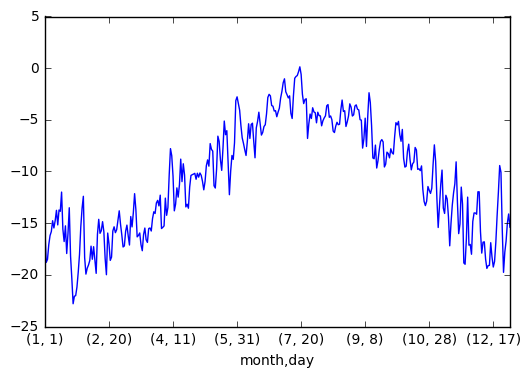

In [144]:
# Choose days with greater mean temperature than in the preceding day
diffs = daily_means.tempC.diff(1)
daily_means.tempC.loc[diffs>0.0]
daily_means.tempC.plot()

In [145]:
airlines = pd.read_csv("nycflights13_airlines.csv.gz", comment = '#')
airlines.head()

  carrier                    name
0      9E       Endeavor Air Inc.
1      AA  American Airlines Inc.
2      AS    Alaska Airlines Inc.
3      B6         JetBlue Airways
4      DL    Delta Air Lines Inc.

In [146]:
planes = pd.read_csv("nycflights13_planes.csv.gz", comment = '#')
planes.head()

  tailnum    year                     type      manufacturer      model  \
0  N10156  2004.0  Fixed wing multi engine           EMBRAER  EMB-145XR   
1  N102UW  1998.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   
2  N103US  1999.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   
3  N104UW  1999.0  Fixed wing multi engine  AIRBUS INDUSTRIE   A320-214   
4  N10575  2002.0  Fixed wing multi engine           EMBRAER  EMB-145LR   

   engines  seats  speed     engine  
0        2     55    NaN  Turbo-fan  
1        2    182    NaN  Turbo-fan  
2        2    182    NaN  Turbo-fan  
3        2    182    NaN  Turbo-fan  
4        2     55    NaN  Turbo-fan  

In [147]:
flights = pd.read_csv("nycflights13_flights.csv.gz", comment = '#')
flights.head()

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416 

In [148]:
airports = pd.read_csv("nycflights13_airports.csv.gz", comment = '#')
airports.head()

   faa                           name        lat        lon   alt  tz dst  \
0  04G              Lansdowne Airport  41.130472 -80.619583  1044  -5   A   
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264  -6   A   
2  06C            Schaumburg Regional  41.989341 -88.101243   801  -6   A   
3  06N                Randall Airport  41.431912 -74.391561   523  -5   A   
4  09J          Jekyll Island Airport  31.074472 -81.427778    11  -5   A   

              tzone  
0  America/New_York  
1   America/Chicago  
2   America/Chicago  
3  America/New_York  
4  America/New_York  

In [149]:
weather = pd.read_csv("nycflights13_weather.csv.gz", comment = '#')
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  

____
1. `SELECT DISTINCT engine FROM planes`
2. `SELECT DISTINCT type, manufacturer, model, seats, engine FROM planes`
3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`
4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`
5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`
___

In [150]:
import sqlite3
conn = sqlite3.connect("/tmp/nycflights13.db") # file path
airports.to_sql('airports', conn)
flights.to_sql('flights', conn)
weather.to_sql('weather', conn)
planes.to_sql('planes', conn)
airlines.to_sql('airlines', conn)


In [151]:
pd.read_sql_query("""SELECT DISTINCT engine FROM PLANES""", conn)

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [152]:
pd.DataFrame(planes.engine.unique(), columns = ['engine'])

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [153]:
pd.read_sql_query("""SELECT DISTINCT type, manufacturer, model, seats, engine FROM planes""", conn)

                         type                   manufacturer  \
0     Fixed wing multi engine                        EMBRAER   
1     Fixed wing multi engine               AIRBUS INDUSTRIE   
2     Fixed wing multi engine                        EMBRAER   
3     Fixed wing multi engine                         BOEING   
4     Fixed wing multi engine                         BOEING   
5     Fixed wing multi engine                         BOEING   
6     Fixed wing multi engine                         AIRBUS   
7     Fixed wing multi engine                 BOMBARDIER INC   
8     Fixed wing multi engine                         BOEING   
9     Fixed wing multi engine                         BOEING   
10    Fixed wing multi engine                         BOEING   
11    Fixed wing multi engine                         AIRBUS   
12    Fixed wing multi engine               AIRBUS INDUSTRIE   
13    Fixed wing multi engine                         BOEING   
14    Fixed wing multi engine           

In [154]:
# SELECT DISTINCT type, engine FROM planes
pd.read_sql_query("""SELECT DISTINCT type, engine FROM planes""", conn)

                       type         engine
0   Fixed wing multi engine      Turbo-fan
1   Fixed wing multi engine      Turbo-jet
2  Fixed wing single engine  Reciprocating
3   Fixed wing multi engine  Reciprocating
4  Fixed wing single engine        4 Cycle
5                Rotorcraft    Turbo-shaft
6   Fixed wing multi engine     Turbo-prop

In [155]:
planes.loc[:, ["type", "engine"]].drop_duplicates().reset_index(drop=True)

                       type         engine
0   Fixed wing multi engine      Turbo-fan
1   Fixed wing multi engine      Turbo-jet
2  Fixed wing single engine  Reciprocating
3   Fixed wing multi engine  Reciprocating
4  Fixed wing single engine        4 Cycle
5                Rotorcraft    Turbo-shaft
6   Fixed wing multi engine     Turbo-prop

In [156]:
# SELECT COUNT(*), engine FROM planes GROUP BY engine
pd.read_sql_query("""SELECT COUNT(*), engine FROM planes GROUP BY engine""", conn)

   COUNT(*)         engine
0         2        4 Cycle
1        28  Reciprocating
2      2750      Turbo-fan
3       535      Turbo-jet
4         2     Turbo-prop
5         5    Turbo-shaft

In [157]:
(planes['engine'].value_counts(sort=False)).to_frame()

               engine
Turbo-jet         535
Turbo-shaft         5
Reciprocating      28
Turbo-prop          2
Turbo-fan        2750
4 Cycle             2

In [158]:
pd.DataFrame(planes.engine.value_counts(sort = False))

               engine
Turbo-jet         535
Turbo-shaft         5
Reciprocating      28
Turbo-prop          2
Turbo-fan        2750
4 Cycle             2

In [159]:
# SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type
pd.read_sql_query('''SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type''', conn)

   COUNT(*)         engine                      type
0         2        4 Cycle  Fixed wing single engine
1         5  Reciprocating   Fixed wing multi engine
2        23  Reciprocating  Fixed wing single engine
3      2750      Turbo-fan   Fixed wing multi engine
4       535      Turbo-jet   Fixed wing multi engine
5         2     Turbo-prop   Fixed wing multi engine
6         5    Turbo-shaft                Rotorcraft

In [160]:
planes.pivot_table(index = ['engine', 'type'], values = 'engines', aggfunc= len).reset_index()

          engine                      type  engines
0        4 Cycle  Fixed wing single engine        2
1  Reciprocating   Fixed wing multi engine        5
2  Reciprocating  Fixed wing single engine       23
3      Turbo-fan   Fixed wing multi engine     2750
4      Turbo-jet   Fixed wing multi engine      535
5     Turbo-prop   Fixed wing multi engine        2
6    Turbo-shaft                Rotorcraft        5

In [161]:
planes.groupby(['engine', 'type']).size().reset_index()

          engine                      type     0
0        4 Cycle  Fixed wing single engine     2
1  Reciprocating   Fixed wing multi engine     5
2  Reciprocating  Fixed wing single engine    23
3      Turbo-fan   Fixed wing multi engine  2750
4      Turbo-jet   Fixed wing multi engine   535
5     Turbo-prop   Fixed wing multi engine     2
6    Turbo-shaft                Rotorcraft     5

In [162]:
# SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer
pd.read_sql_query("""SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer""", conn)

    MIN(year)    AVG(year)  MAX(year)         engine  \
0      1975.0  1975.000000     1975.0        4 Cycle   
1         NaN          NaN        NaN        4 Cycle   
2         NaN          NaN        NaN  Reciprocating   
3      2007.0  2007.000000     2007.0  Reciprocating   
4         NaN          NaN        NaN  Reciprocating   
5      1959.0  1971.142857     1983.0  Reciprocating   
6      2007.0  2007.000000     2007.0  Reciprocating   
7      1959.0  1959.000000     1959.0  Reciprocating   
8      1956.0  1956.000000     1956.0  Reciprocating   
9      2007.0  2007.000000     2007.0  Reciprocating   
10        NaN          NaN        NaN  Reciprocating   
11     1985.0  1985.000000     1985.0  Reciprocating   
12        NaN          NaN        NaN  Reciprocating   
13     1985.0  1985.000000     1985.0  Reciprocating   
14     1993.0  1993.000000     1993.0  Reciprocating   
15        NaN          NaN        NaN  Reciprocating   
16     1968.0  1976.400000     1980.0  Reciproca

In [163]:
planes.groupby(
    ['engine', 'manufacturer']
)['year'].describe().unstack().loc[:, ['min', 'mean', 'max']].dropna().reset_index()

           engine                   manufacturer     min         mean     max
0         4 Cycle                         CESSNA  1975.0  1975.000000  1975.0
1   Reciprocating             AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
2   Reciprocating                         CESSNA  1959.0  1971.142857  1983.0
3   Reciprocating             CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
4   Reciprocating                    DEHAVILLAND  1959.0  1959.000000  1959.0
5   Reciprocating                        DOUGLAS  1956.0  1956.000000  1956.0
6   Reciprocating                 FRIEDEMANN JON  2007.0  2007.000000  2007.0
7   Reciprocating                   KILDALL GARY  1985.0  1985.000000  1985.0
8   Reciprocating                LEBLANC GLENN T  1985.0  1985.000000  1985.0
9   Reciprocating                     MARZ BARRY  1993.0  1993.000000  1993.0
10  Reciprocating                          PIPER  1968.0  1976.400000  1980.0
11  Reciprocating                   STEWART MACO  1985.0  1985.0

In [164]:
planes.groupby(
    ['engine', 'manufacturer']
)['year'].agg([np.min, np.mean, np.max]).dropna().reset_index()

           engine                   manufacturer    amin         mean    amax
0         4 Cycle                         CESSNA  1975.0  1975.000000  1975.0
1   Reciprocating             AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
2   Reciprocating                         CESSNA  1959.0  1971.142857  1983.0
3   Reciprocating             CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
4   Reciprocating                    DEHAVILLAND  1959.0  1959.000000  1959.0
5   Reciprocating                        DOUGLAS  1956.0  1956.000000  1956.0
6   Reciprocating                 FRIEDEMANN JON  2007.0  2007.000000  2007.0
7   Reciprocating                   KILDALL GARY  1985.0  1985.000000  1985.0
8   Reciprocating                LEBLANC GLENN T  1985.0  1985.000000  1985.0
9   Reciprocating                     MARZ BARRY  1993.0  1993.000000  1993.0
10  Reciprocating                          PIPER  1968.0  1976.400000  1980.0
11  Reciprocating                   STEWART MACO  1985.0  1985.0

In [165]:
np.min.__name__

'amin'

In [166]:
myaggfunc = lambda x: np.min(x) + np.max(x)*0.5
myaggfunc.__name__ = 'midrange'

planes.groupby(
['engine', 'manufacturer']
)['year'].agg([np.min, np.mean, np.max, myaggfunc]).dropna().reset_index()

           engine                   manufacturer    amin         mean    amax  \
0         4 Cycle                         CESSNA  1975.0  1975.000000  1975.0   
1   Reciprocating             AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0   
2   Reciprocating                         CESSNA  1959.0  1971.142857  1983.0   
3   Reciprocating             CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0   
4   Reciprocating                    DEHAVILLAND  1959.0  1959.000000  1959.0   
5   Reciprocating                        DOUGLAS  1956.0  1956.000000  1956.0   
6   Reciprocating                 FRIEDEMANN JON  2007.0  2007.000000  2007.0   
7   Reciprocating                   KILDALL GARY  1985.0  1985.000000  1985.0   
8   Reciprocating                LEBLANC GLENN T  1985.0  1985.000000  1985.0   
9   Reciprocating                     MARZ BARRY  1993.0  1993.000000  1993.0   
10  Reciprocating                          PIPER  1968.0  1976.400000  1980.0   
11  Reciprocating           

___
6. `SELECT * FROM planes WHERE speed IS NOT NULL`
7. `SELECT tailnum FROM planes WHERE year >= 2010`
8. `SELECT tailnum FROM planes WHERE seats BETWEEN 100 and 200 LIMIT 20`
9. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER")`
10. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>300`
___

In [167]:
# SELECT * FROM planes WHERE speed IS NOT NULL
pd.read_sql_query("""SELECT * FROM planes WHERE speed IS NOT NULL""", conn)

    index tailnum    year                      type       manufacturer  \
0     424  N201AA  1959.0  Fixed wing single engine             CESSNA   
1     427  N202AA  1980.0   Fixed wing multi engine             CESSNA   
2     821  N350AA  1980.0   Fixed wing multi engine              PIPER   
3     893  N364AA  1973.0   Fixed wing multi engine             CESSNA   
4    1027  N378AA  1963.0  Fixed wing single engine             CESSNA   
5    1037  N381AA  1956.0   Fixed wing multi engine            DOUGLAS   
6    1190  N425AA  1968.0  Fixed wing single engine              PIPER   
7    1430  N508AA  1975.0                Rotorcraft               BELL   
8    1480  N519MQ  1983.0  Fixed wing single engine             CESSNA   
9    1515  N525AA  1980.0   Fixed wing multi engine              PIPER   
10   1589  N545AA  1976.0  Fixed wing single engine              PIPER   
11   1694  N567AA  1959.0  Fixed wing single engine        DEHAVILLAND   
12   1813  N600TR  1979.0   Fixed wing

In [168]:
planes.dropna(subset = ['speed'], how = 'all').reset_index()

    index tailnum    year                      type       manufacturer  \
0     424  N201AA  1959.0  Fixed wing single engine             CESSNA   
1     427  N202AA  1980.0   Fixed wing multi engine             CESSNA   
2     821  N350AA  1980.0   Fixed wing multi engine              PIPER   
3     893  N364AA  1973.0   Fixed wing multi engine             CESSNA   
4    1027  N378AA  1963.0  Fixed wing single engine             CESSNA   
5    1037  N381AA  1956.0   Fixed wing multi engine            DOUGLAS   
6    1190  N425AA  1968.0  Fixed wing single engine              PIPER   
7    1430  N508AA  1975.0                Rotorcraft               BELL   
8    1480  N519MQ  1983.0  Fixed wing single engine             CESSNA   
9    1515  N525AA  1980.0   Fixed wing multi engine              PIPER   
10   1589  N545AA  1976.0  Fixed wing single engine              PIPER   
11   1694  N567AA  1959.0  Fixed wing single engine        DEHAVILLAND   
12   1813  N600TR  1979.0   Fixed wing

In [169]:
# SELECT tailnum FROM planes WHERE year >= 2010
pd.read_sql_query("""SELECT tailnum FROM planes WHERE year >= 2010""", conn)

    tailnum
0    N127UW
1    N128UW
2    N150UW
3    N151UW
4    N152UW
5    N153UW
6    N154UW
7    N155UW
8    N156UW
9    N157UW
10   N198UW
11   N199UW
12   N205FR
13   N206FR
14   N207FR
15   N208FR
16   N20904
17   N209FR
18   N210FR
19   N211FR
20   N213FR
21   N214FR
22   N216FR
23   N26906
24   N272PQ
25   N27477
26   N27901
27   N279PQ
28   N28457
29   N28478
..      ...
271  N913JB
272  N943WN
273  N944WN
274  N945WN
275  N946WN
276  N947WN
277  N948WN
278  N949WN
279  N950WN
280  N951WN
281  N952FR
282  N952WN
283  N953FR
284  N953WN
285  N954WN
286  N955WN
287  N956WN
288  N957WN
289  N958WN
290  N959WN
291  N960WN
292  N961WN
293  N962WN
294  N963WN
295  N964WN
296  N965WN
297  N966WN
298  N967WN
299  N968WN
300  N969WN

[301 rows x 1 columns]

In [170]:
planes.tailnum[planes.year >= 2010].reset_index()

     index tailnum
0       88  N127UW
1       89  N128UW
2      215  N150UW
3      216  N151UW
4      218  N152UW
5      221  N153UW
6      223  N154UW
7      228  N155UW
8      230  N156UW
9      233  N157UW
10     418  N198UW
11     421  N199UW
12     435  N205FR
13     437  N206FR
14     441  N207FR
15     443  N208FR
16     445  N20904
17     446  N209FR
18     448  N210FR
19     456  N211FR
20     459  N213FR
21     461  N214FR
22     465  N216FR
23     567  N26906
24     578  N272PQ
25     584  N27477
26     596  N27901
27     600  N279PQ
28     609  N28457
29     610  N28478
..     ...     ...
271   2982  N913JB
272   3148  N943WN
273   3153  N944WN
274   3158  N945WN
275   3162  N946WN
276   3166  N947WN
277   3171  N948WN
278   3175  N949WN
279   3179  N950WN
280   3184  N951WN
281   3187  N952FR
282   3189  N952WN
283   3193  N953FR
284   3195  N953WN
285   3199  N954WN
286   3204  N955WN
287   3210  N956WN
288   3215  N957WN
289   3220  N958WN
290   3225  N959WN
291   3229  

In [171]:
# SELECT tailnum FROM planes WHERE seats BETWEEN 100 and 200 LIMIT 20
pd.read_sql_query("""SELECT tailnum FROM planes WHERE seats BETWEEN 100 and 200 LIMIT 20""", conn)

   tailnum
0   N102UW
1   N103US
2   N104UW
3   N105UW
4   N107US
5   N108UW
6   N109UW
7   N110UW
8   N111US
9   N11206
10  N112US
11  N113UW
12  N114UW
13  N117UW
14  N118US
15  N119US
16  N12109
17  N12114
18  N12116
19  N12125

In [172]:
planes['tailnum'][(planes.seats >100) & (planes.seats < 200)].head(20).reset_index()

    index tailnum
0       1  N102UW
1       2  N103US
2       3  N104UW
3       5  N105UW
4       6  N107US
5       7  N108UW
6       8  N109UW
7       9  N110UW
8      33  N111US
9      34  N11206
10     35  N112US
11     36  N113UW
12     37  N114UW
13     46  N117UW
14     47  N118US
15     48  N119US
16     51  N12109
17     52  N12114
18     53  N12116
19     55  N12125

In [173]:
# SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER")
pd.read_sql_query("""SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER")""", conn)

      index tailnum    year                     type manufacturer      model  \
0         0  N10156  2004.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
1         4  N10575  2002.0  Fixed wing multi engine      EMBRAER  EMB-145LR   
2        10  N11106  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
3        11  N11107  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
4        12  N11109  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
5        13  N11113  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
6        14  N11119  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
7        15  N11121  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
8        16  N11127  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
9        17  N11137  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
10       18  N11140  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
11       19  N11150  2003.0  Fixed wing 

In [174]:
planes[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"])]

     tailnum    year                     type manufacturer      model  \
0     N10156  2004.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
4     N10575  2002.0  Fixed wing multi engine      EMBRAER  EMB-145LR   
10    N11106  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
11    N11107  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
12    N11109  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
13    N11113  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
14    N11119  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
15    N11121  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
16    N11127  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
17    N11137  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
18    N11140  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
19    N11150  2003.0  Fixed wing multi engine      EMBRAER  EMB-145XR   
20    N11155  2004.0  Fixed wing multi engine      

In [175]:
#SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>300
pd.read_sql_query("""SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>300""", conn)

     index tailnum    year                     type manufacturer     model  \
0       49  N1200K  1998.0  Fixed wing multi engine       BOEING   767-332   
1       50  N1201P  1998.0  Fixed wing multi engine       BOEING   767-332   
2       69  N121DE  1987.0  Fixed wing multi engine       BOEING   767-332   
3      117  N136DL  1991.0  Fixed wing multi engine       BOEING   767-332   
4      122  N137DL  1991.0  Fixed wing multi engine       BOEING   767-332   
5      183  N143DA  1998.0  Fixed wing multi engine       BOEING   767-332   
6      241   N1602  1999.0  Fixed wing multi engine       BOEING   767-332   
7      242   N1603  1999.0  Fixed wing multi engine       BOEING   767-332   
8      243  N1604R  1999.0  Fixed wing multi engine       BOEING   767-332   
9      244   N1605  1999.0  Fixed wing multi engine       BOEING   767-332   
10     245  N16065  1999.0  Fixed wing multi engine       BOEING   767-332   
11     246  N1607B  2000.0  Fixed wing multi engine       BOEING

In [176]:
planes[(planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"])) & (planes.seats > 300)]

     tailnum    year                     type manufacturer     model  engines  \
49    N1200K  1998.0  Fixed wing multi engine       BOEING   767-332        2   
50    N1201P  1998.0  Fixed wing multi engine       BOEING   767-332        2   
69    N121DE  1987.0  Fixed wing multi engine       BOEING   767-332        2   
117   N136DL  1991.0  Fixed wing multi engine       BOEING   767-332        2   
122   N137DL  1991.0  Fixed wing multi engine       BOEING   767-332        2   
183   N143DA  1998.0  Fixed wing multi engine       BOEING   767-332        2   
241    N1602  1999.0  Fixed wing multi engine       BOEING   767-332        2   
242    N1603  1999.0  Fixed wing multi engine       BOEING   767-332        2   
243   N1604R  1999.0  Fixed wing multi engine       BOEING   767-332        2   
244    N1605  1999.0  Fixed wing multi engine       BOEING   767-332        2   
245   N16065  1999.0  Fixed wing multi engine       BOEING   767-332        2   
246   N1607B  2000.0  Fixed 